[*********************100%%**********************]  1 of 1 completed
<ipython-input-4-38c1b1d6346f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Position'].iloc[i] = data['Position'].iloc[i-1]  # 이전 포지션 유지
<ipython-input-4-38c1b1d6346f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Position'].iloc[i] = data['Position'].iloc[i-1]  # 이전 포지션 유지
<ipython-input-4-38c1b1d6346f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

                 Close   Returns  Cumulative Returns  Strategy Returns  \
Date                                                                     
2023-12-22  193.600006 -0.005547            0.547933         -0.005547   
2023-12-26  193.050003 -0.002841            0.543536         -0.002841   
2023-12-27  193.149994  0.000518            0.544335          0.000518   
2023-12-28  193.580002  0.002226            0.547773          0.002226   
2023-12-29  192.529999 -0.005424            0.539378         -0.005424   

            Cumulative Strategy Returns  
Date                                     
2023-12-22                     0.547933  
2023-12-26                     0.543536  
2023-12-27                     0.544335  
2023-12-28                     0.547773  
2023-12-29                     0.539378  


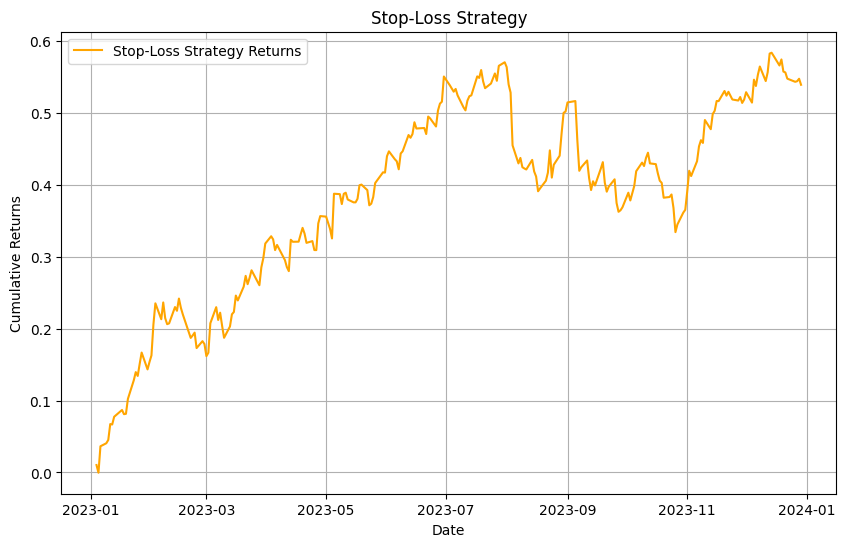

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# yfinance를 사용하여 데이터 다운로드
ticker = 'AAPL'
data = yf.download(ticker, start="2023-01-01", end="2023-12-31")
data['Returns'] = data['Close'].pct_change()

# Stop-Loss 설정
stop_loss_threshold = 0.1  # 예: 10% 하락 시 매도

def apply_stop_loss(data, stop_loss_threshold):
    """
    Stop-Loss 전략 적용 함수

    Parameters:
    data: 주식 데이터 DataFrame
    stop_loss_threshold: Stop-Loss 임계값

    Returns:
    Stop-Loss 전략 적용 후의 수익률 Series
    """
    data['Position'] = 1
    for i in range(1, len(data)):
        if data['Close'].iloc[i] < data['Close'].iloc[i-1] * (1 - stop_loss_threshold):
            data['Position'].iloc[i] = 0  # Stop-Loss 조건 만족 시 매도
        else:
            data['Position'].iloc[i] = data['Position'].iloc[i-1]  # 이전 포지션 유지

    data['Strategy Returns'] = data['Returns'] * data['Position'].shift(1)
    return data['Strategy Returns']

# Stop-Loss 전략 적용
data['Strategy Returns'] = apply_stop_loss(data, stop_loss_threshold)

# 누적 수익률 계산
data['Cumulative Returns'] = (1 + data['Returns']).cumprod() - 1
data['Cumulative Strategy Returns'] = (1 + data['Strategy Returns']).cumprod() - 1

# 결과 출력
print(data[['Close', 'Returns', 'Cumulative Returns', 'Strategy Returns', 'Cumulative Strategy Returns']].tail())

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Cumulative Strategy Returns'], label='Stop-Loss Strategy Returns', color='orange')
plt.title('Stop-Loss Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()
